# INF8460: Traitement automatique de la langue naturelle

# TP1: Comparaison d'algorithmes pour classification de texte

## Identification de l'équipe:

### Groupe de laboratoire: 

### Equipe numéro : 

### Membres: 

- membre 1 (% de contribution, nature de la contribution)
- membre 2 (% de contribution, nature de la contribution)
- membre 3 (% de contribution, nature de la contribution)

* nature de la contribution: Décrivez brièvement ce qui a été fait par chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. 


## Description:

Dans ce premier TP, vous explorerez les bases du traitement automatique du langage naturel. Au cours de ce travail, vous appliquerez concrètement les concepts enseignés en classe pour résoudre une tâche de classification simple. De plus, le processus ressemblera à la manière dont vous aborderiez ce type de problème dans le monde réel. Tout au long de ce laboratoire, vous vous familiariserez avec des bibliothèques couramment utilisées en NLP ainsi qu'en science des données.

Dans ce laboratoire, vous travaillerez avec un jeu de données comprenant des évaluations de produits provenant d'Amazon. Pour chaque évaluation, le jeu de données contient trois informations : le titre fourni par l'utilisateur, le commentaire détaillé et le nombre d'étoiles attribué par l'utilisateur au produit.

L'objectif de cette tâche consistera à prédire le nombre d'étoiles attribué à une évaluation à partir du commentaire et du titre qui lui sont associés.

Le travail sera divisé en 3 parties:

 - Chargement, prétraitement et visualisation des données: Dans cette première partie, vous allez charger et prétraiter les données afin qu'elles soient prêtes à être utilisées par les algorithmes lors de la deuxième partie.
 - Classification: Cette partie consistera à explorer les différents algorithmes pouvant être appliqués à cette tâche. Vous ferez aussi une analyse des sorties du classificateur bayésien naïf.
 - Amélioration de modèle: Cette dernière partie consistera à améliorer votre modèle de 2 façons différentes. D'abord, vous ferez une recherche d'hyper-paramètres avec de la validation croisée en utilisant un GridSearch. Ensuite, vous ferez de l'extraction d'attributs avec l'aide de ChatGPT afin de d'entrainer un nouveau modèle et de comparer ainsi une représentation de type "Bag of words" et une représentation avec attributs spécifiques. 


## Plan du TP

1.    [Chargement, prétraitement et visualisation des données](#1)
- 1.1   [Charger les données](#1.1)
 - 1.1.1 [Charger le jeu de données](#1.1.1)
 - 1.1.2 [Fusionner les colonnes title et text en une seule colonne](#1.1.2)
- 1.2   [Prétraitement des données](#1.2)
- 1.3   [Visualisation des données](#1.3)
 - 1.3.1 [Afficher dans un graphique le nombre d'exemples présents dans le jeu de données pour chaque catégorie](#1.3.1)
 - 1.3.2 [Afficher dans un graphique la quantité moyenne de jetons par exemple selon la catégorie](#1.3.2)
 - 1.3.3 [Afficher en texte les top 10 jetons les plus fréquents par catégorie](#1.3.3)
 - 1.3.4 [Afficher en texte les top 10 adjectifs les plus fréquents selon la catégorie](#1.3.4)
- 1.4   [Diviser les données en ensembles d'entraînement et de test](#1.4)
- 1.5   [Construction du vocabulaire](#1.5)
- 1.6   [Vectorisation des données](#1.6)
2.    [Classification](#2)
- 2.1   [Modèle aléatoire (Random baseline)](#2.1)
- 2.2   [Analyse et compréhension d'un classificateur bayésien naïf (NB)](#2.2)
 - 2.2.1 [Construction du modèle](#2.2.1)
 - 2.2.2 [Matrice de confusion](#2.2.2)
 - 2.2.3 [Visualisation des probabilités de NB](#2.2.3)
 - 2.2.4 [Visualisation des erreurs commises](#2.2.4)
 - 2.2.5 [Analyse d'erreurs commises](#2.2.5)
- 2.3   [Régression logistique](#2.3)
- 2.4   [MLP](#2.4)
3.    [Amélioration de modèle](#3)
- 3.1   [Recherche d'hyper-paramètres et validation croisée](#3.1)
- 3.2   [Extraction d'attributs (Feature extraction) avec ChatGPT](#3.2)
- 3.3   [Amélioration du modèle en 3.2](#3.3)





<a name='1'></a>
## 1. Chargement, prétraitement et visualisation des données (30 points)

Dans cette première partie, vous allez charger et prétraiter les données afin qu'elles soient prêtes à être utilisées par les algorithmes lors de la deuxième partie.

<a name='1.1'></a>
### 1.1 Charger les données  (2 points)

Ce numéro doit être résolu en utilisant la bibliothèque **pandas**.

<a name='1.1.1'></a>
#### 1.1.1 Charger le jeu de données (1 point)

Chargez le jeu de données amazon_rating.csv. Affichez ensuite son contenu.


In [1]:
import pandas as pd

In [2]:
path = "./amazon_rating.csv"
data = pd.read_csv(path)
data.head()

,title,text,rating
0,Five Stars,good as any name brand,5
1,Did The Job,Ordered on accident when I had searched for RE...,3
2,Great product,I was looking for something to read on and thi...,5
3,Leaking Acid EVERYEWHERE!!,After 2nd recharge and use all but 3 are leaki...,1
4,One Star,They fail earlier than brand names. I assumed ...,1


<a name='1.1.2'></a>
#### 1.1.2 Fusionner les colonnes title et text en une seule colonne (1 point)

Afin de faciliter la tâche pour le reste du TP, nous allons fusionner ces deux colonnes afin que nous n'ayons qu'un seul texte à considérer lors de la vectorisation.

Afin de s'assurer de l'intégrité des textes, fusionnez-les à l'aide d'un espace. Par exemple, une évaluation ayant le titre "Five Stars" et le commentaire "good as any name brand" aura comme texte final "Five Stars good as any name brand".

Stockez le résultat dans la colonne "text" et supprimez la colonne "title".

In [3]:
data["text"] = data["title"] + " " + data["text"]
data.drop(["title"], axis=1, inplace=True)
data.head()

,text,rating
0,Five Stars good as any name brand,5
1,Did The Job Ordered on accident when I had sea...,3
2,Great product I was looking for something to r...,5
3,Leaking Acid EVERYEWHERE!! After 2nd recharge ...,1
4,One Star They fail earlier than brand names. I...,1


<a name='1.2'></a>
### 1.2 Prétraitement des données (4 points)

En utilisant la librairie nltk, implémentez la fonction suivante qui :

- Enlève les majuscules.
- Enlève les caractères de ponctuation.
- Segmente la séquence en entrée en une liste de jetons (tokenization).
- Enlève les "stopwords"
- Effectue la racinisation.
- Retourne l'ensemble des jetons de la séquence
    

In [4]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andychen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/andychen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/andychen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
stopwords = stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()
#lemmer = nltk.stem.wordnet.WordNetLemmatizer()


def preprocess(sentence):
    """
    Fonction qui transforme une chaine de caractère en liste de jetons.
    Les pre-traitements à implémenter sont: 
    1. Enlever les majuscules
    2. Enlever les caractères de ponctuations
    3. Séparer la chaine de caractères en une liste de jetons (tokenization) 
    4. Enlever les stopwords
    5. Stemming (racinisation)
    
    :param sentence: une chaine de caractère
    :return: la liste de jetons
    """ 
    
    # TODO
    # Enlever les majuscules
    sentence = sentence.lower()
    # Enlever les caractères de ponctuations
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # tokenization
    tokenized_words = word_tokenize(sentence)
    # Enlever les stopwords et stemming
    tokens = [stemmer.stem(token) for token in tokenized_words if token not in stopwords]
    # garder les jetons uniques
    # unique_tokens = set()
    # for token in tokens:
    #     unique_tokens.add(token)
    return tokens

In [6]:
"""
NE PAS MODIFIER

Le code suivant appliquera votre fonction sur tous les exemples. Il gardera aussi une version originale pour une analyse future.
"""

data["text_original"] = data["text"]
data["text"] = data["text"].apply(preprocess)


<a name='1.3'></a>
### 1.3 Visualisation des données (15 points)

**Utilisez la bibliothèque matplotlib pour les graphiques.** Vous pouvez utiliser n'importe quelle classe de base de Python, par exemple collections.Counter, qui sera utile pour l'affichage des jetons.

La colonne "rating" contient le nombre d'étoiles associé à l'évaluation d'un utilisateur. Le nombre d'étoiles varie entre 1 et 5.

Afin de simplifier la tâche de classification, nous avons enlevé les commentaires ayant 2 et 4 étoiles du jeu de données. Cela signifie qu'il y a trois catégories de commentaires, c'est-à-dire ceux ayant 1, 3 ou 5 étoiles.

Affichez dans un graphique :

- Le nombre d'exemples présents dans le jeu de données par catégorie.
- La quantité moyenne de jetons par exemple selon la catégorie.


<a name='1.3.1'></a>
#### 1.3.1  Afficher dans un graphique le nombre d'exemples présents dans le jeu de données pour chaque catégorie  (3 points)

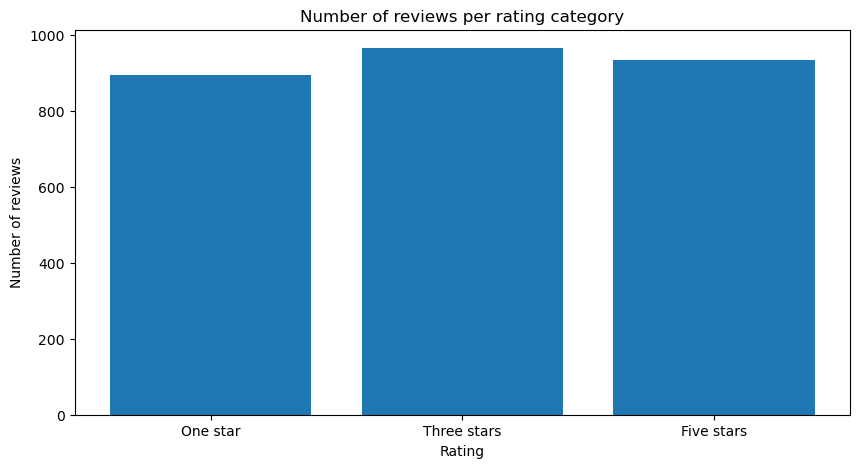

In [7]:
import matplotlib.pyplot as plt
one_star_reviews = data[data["rating"] == 1]
three_stars_reviews = data[data["rating"] == 3]
five_stars_reviews = data[data["rating"] == 5]

# nombre de commentaires par categorie
one_stars_count = len(one_star_reviews)
three_stars_count = len(three_stars_reviews)
five_stars_count = len(five_stars_reviews)

# definir les axes du graphique
x = ["One star", "Three stars", "Five stars"]
y = [one_stars_count, three_stars_count, five_stars_count]

fig = plt.figure(figsize=(10, 5))
# afficher les valeurs avec un bar chart
plt.bar(x, y)
plt.xlabel("Rating")
plt.ylabel("Number of reviews")
plt.title("Number of reviews per rating category")
plt.show()

<a name='1.3.2'></a>
#### 1.3.2 Afficher dans un graphique le nombre moyen de jetons dans les exemples de chaque catégorie (4 points)

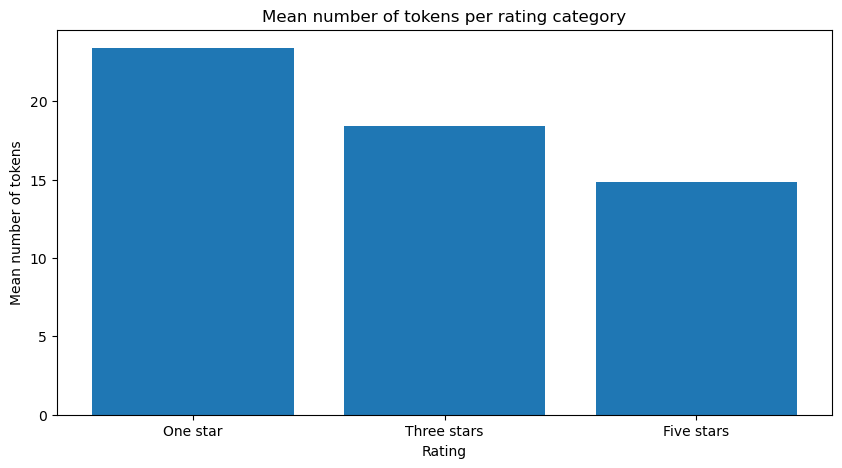

In [8]:
# nombre de moyen de jetons par categorie
one_stars_tokens_mean = one_star_reviews["text"].str.len().sum() / one_stars_count
three_stars_tokens_mean = three_stars_reviews["text"].str.len().sum() / three_stars_count
five_stars_tokens_mean = five_stars_reviews["text"].str.len().sum() / five_stars_count

# definir les axes du graphique
x = ["One star", "Three stars", "Five stars"]
y = [one_stars_tokens_mean, three_stars_tokens_mean, five_stars_tokens_mean]

fig = plt.figure(figsize=(10, 5))
# afficher les valeurs avec un bar chart
plt.bar(x, y)
plt.xlabel("Rating")
plt.ylabel("Mean number of tokens")
plt.title("Mean number of tokens per rating category")
plt.show()

<a name='1.3.3'></a>
#### 1.3.3 Afficher en texte les top 10 des jetons les plus fréquents par catégorie (4 points)


Affichez en texte les 10 jetons les plus fréquents selon la catégorie.


In [9]:
from collections import Counter
def get_most_frequent_tokens(reviews):
    # iterer sur tous les jetons et compter leur frequence
    tokens = []
    for tokens_list in reviews["text"]:
        tokens += tokens_list
    counter = Counter(tokens)
    return counter.most_common(10)

In [10]:
print("10 most frequent 1 star tokens:")
print(get_most_frequent_tokens(one_star_reviews))
print("10 most frequent 3 stars tokens:")
print(get_most_frequent_tokens(three_stars_reviews))
print("10 most frequent 5 stars tokens:")
print(get_most_frequent_tokens(five_stars_reviews))

10 most frequent 1 star tokens:
[('batteri', 1211), ('last', 403), ('one', 345), ('use', 328), ('amazon', 311), ('work', 265), ('buy', 235), ('dont', 221), ('star', 179), ('purchas', 162)]
10 most frequent 3 stars tokens:
[('batteri', 454), ('tablet', 380), ('good', 360), ('use', 244), ('last', 238), ('great', 228), ('price', 228), ('three', 193), ('star', 186), ('long', 183)]
10 most frequent 5 stars tokens:
[('great', 615), ('tablet', 386), ('batteri', 374), ('love', 306), ('good', 260), ('price', 244), ('use', 211), ('star', 182), ('five', 181), ('work', 167)]


<a name='1.3.4'></a>
#### 1.3.4 Afficher en texte les top 10 des adjectifs les plus fréquents selon la catégorie (4 points)

Pour cet exercice, vous devrez utiliser la fonction [nltk.pos_tag](https://www.nltk.org/book/ch05.html) et retenir les jetons identifiés comme JJ.
 
Pour obtenir de bons résultats, le tagger [nltk.pos_tag](https://www.nltk.org/book/ch05.html) doit être exécuté sur le texte original, incluant les stopwords. 
Vous devrez donc partir des évaluations originales. Pour vous simplifier la tâche, utilisez 
le tokenizer *word_tokenize* provenant de nltk.

**Les adjectifs sont les jetons identifiés comme JJ.**

In [11]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

def get_most_frequent_adjectives(reviews):
    # iterer sur tous les jetons et compter leur frequence
    words = []
    for tokens in reviews["text_original"]:
        words += word_tokenize(tokens)
    tags = pos_tag(words)
    adjectives = []
    for word, tag in tags:
        if tag == "JJ":
            adjectives.append(word)
    counter = Counter(adjectives)
    return counter.most_common(10)

In [12]:
print("10 most frequent 1 star adjectives:")
print(get_most_frequent_adjectives(one_star_reviews))
print("10 most frequent 3 stars adjectives:")
print(get_most_frequent_adjectives(three_stars_reviews))
print("10 most frequent 5 stars adjectives:")
print(get_most_frequent_adjectives(five_stars_reviews))


10 most frequent 1 star adjectives:
[('last', 259), ('good', 102), ('dead', 96), ('other', 83), ('few', 72), ('same', 66), ('bad', 65), ('new', 62), ('first', 53), ('long', 50)]
10 most frequent 3 stars adjectives:
[('good', 238), ('last', 201), ('great', 132), ('other', 82), ('Good', 77), ('old', 63), ('little', 62), ('slow', 56), ('ok', 51), ('long', 44)]
10 most frequent 5 stars adjectives:
[('great', 260), ('good', 175), ('old', 90), ('easy', 83), ('other', 64), ('Good', 58), ('last', 58), ('long', 36), ('little', 34), ('Great', 30)]


<a name='1.4'></a>
### 1.4 Diviser les données en ensembles d'entraînement et de test (1 point)

À l'aide de la fonction [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de SKlearn, séparez les données en ensembles d'entraînement (67% des données) et de test (33% des données). Gardez les deux ensembles dans 2 variables.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['rating'], test_size=0.33, random_state=1)

train_data = pd.DataFrame({'text': X_train, 'rating': y_train})
test_data = pd.DataFrame({'text': X_test, 'rating': y_test})

<a name='1.5'></a>
### 1.5 Construction du vocabulaire (4 points)

Dans un modèle Bag-of-Words (BoW), un vocabulaire est prédéterminé à partir de l'ensemble d'entraînement. Seuls les mots faisant partie de ce vocabulaire seront considérés pour la suite.

Complétez la fonction **build_voc** qui retourne une liste de jetons qui sont présents au moins n fois (threshold passé en paramètre) dans la liste d'exemples (également passée en paramètre). Vous pouvez utiliser la classe Counter.

Ensuite, appelez cette fonction pour construire votre vocabulaire.

In [14]:
def build_voc(documents, threshold):
    tokens = []
    for document in documents:
        for token in document:
            tokens.append(token)    
    
    counter = Counter(tokens)
    vocabulary = []
    for token, count in counter.items():
        if count >= threshold:
            vocabulary.append(token)

    return vocabulary

In [15]:
vocabulary = build_voc(X_train, 10)

In [16]:
len(vocabulary)

612

<a name='1.6'></a>
### 1.6 Vectorisation des données (4 points)

À l'aide de la classe [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) de Sklearn, transformez l'ensemble de jetons en matrice de co-occurence utilisant TF-IDF.

Utilisez le vocabulaire construit au numéro précédent dans votre matrice de co-occurrence (voir le paramètre vocabulary de TfidfVectorizer). 

**Faites attention:** Il ne faut pas entrainer (fit) la vectorisation sur l'ensemble de test

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(vocabulary=vocabulary)
# concat list of lists into a single list where each item is a sentence
sentences_list = [' '.join(sentence) for sentence in X_train]
train_matrix = vectorizer.fit_transform(sentences_list)

sentences_list = [' '.join(sentence) for sentence in X_test]
test_matrix = vectorizer.fit_transform(sentences_list)


<a name='2'></a>
## 2. Classification (35 points)

Maintenant que les données sont prêtes à être utilisées par nos modèles, nous allons entrainer et tester différent types de modèles sur le jeu de données afin d'en faire la comparaison. 

Cette section sera divisé en cinq modèle:
   - Modèle aléatoire (Random baseline)
   - Classificateur bayésien naïf
   - Régression Logistique
   - Multi-Layer Perceptron (MLP)

<a name='2.1'></a>
### 2.1 Modèle aléatoire (Random baseline) (5 points)

Un seuil (baseline) est un modèle servant de référence et dont les performances représentent un seuil à dépasser.

#### a) Générez ce seuil en effectuant des prédictions aléatoires parmi les valeurs 1, 3 et 5. Ensuite, affichez les mesures de performance : précision, rappel (recall) et F1. Utilisez la classe classification_report de SKlearn et affichez 4 chiffres après la virgule. (3.5 points)

In [18]:
import random

def generate_random_score():
    return random.choice([1, 3, 5])

# appliquer cette fonction sur les donnees de test pour servir de baseline
random_scores = []
for i in range(len(test_data)):
    random_scores.append(generate_random_score())
test_data["random_score"] = random_scores

In [19]:
from sklearn.metrics import classification_report

y_random = test_data["random_score"]
print(classification_report(y_test, y_random, digits=4))

              precision    recall  f1-score   support

           1     0.3187    0.3269    0.3228       312
           3     0.3436    0.3096    0.3257       323
           5     0.3023    0.3275    0.3144       287

    accuracy                         0.3210       922
   macro avg     0.3215    0.3213    0.3210       922
weighted avg     0.3223    0.3210    0.3212       922



#### b) Comment pouvez-vous expliquer le F1-score obtenu? (1.5 points)

> *Le F1-score est faible (proche de 0.33 en moyenne), ce qui signifie que le taux de précision et de rappel ne sont pas élevés. Cela est expliqué par le fait que les résultats obtenus diffèrent beaucoup trop du résultat actuel car ils sont générés aléatoirement sans tenir compte des variables explicatives. On aura donc en moyenne une précision et un rappel de 1/3, donc un F1-score de 0.33*

<a name='2.2'></a>
### 2.2 Analyse et compréhension d'un classificateur bayésien naïf (NB) (22 points)

Naive Bayes (NB) est un algorithme très simple pouvant servir de bon point de départ (baseline) pour les tâches de classification. Ce numéro portera sur l'analyse de ce modèle afin de bien comprendre son comportement.

<a name='2.2.1'></a>
#### 2.2.1 Construction du modèle (4 points)

Commencez d'abord par construire le modèle à l'aide de la classe MultinomialNB de SKlearn. Utilisez les données vectorisées produites en 1.6.

Affichez les performances de votre classificateur (précision, recall, F1-score).

In [20]:
from sklearn.naive_bayes import MultinomialNB

nbModel = MultinomialNB()
# fit the model on the train data
nbModel.fit(train_matrix, y_train)

nb_predictions = nbModel.predict(test_matrix)

In [21]:
print(classification_report(y_test, nb_predictions, digits=4))

              precision    recall  f1-score   support

           1     0.8237    0.8237    0.8237       312
           3     0.7708    0.6873    0.7267       323
           5     0.7360    0.8258    0.7783       287

    accuracy                         0.7766       922
   macro avg     0.7769    0.7789    0.7762       922
weighted avg     0.7779    0.7766    0.7756       922



<a name='2.2.2'></a>
####  2.2.2 Matrice de confusion (3 points)

Visualisez la matrice de confusion de votre modèle en utilisant la fonction [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) de seaborn. Celle-ci peut prendre en entrée une matrice de confusion comme celle fournie par la fonction [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) dans SKLearn.

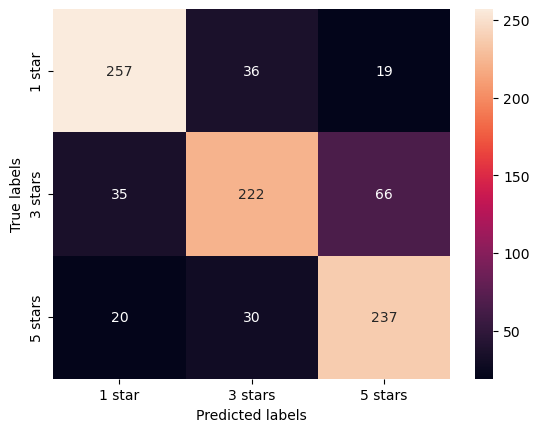

In [22]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

conf_matrix = confusion_matrix(y_test, nb_predictions)
ax = heatmap(conf_matrix, annot=True, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['1 star', '3 stars', '5 stars'])
ax.yaxis.set_ticklabels(['1 star', '3 stars', '5 stars'])
plt.show()

<a name='2.2.3'></a>
####  2.2.3 Visualisation des probabilités de NB (5 points)

Naive Bayes est un classificateur suivant une approche générative. Durant son entraînement, il apprend les probabilités P(x_i|y). En utilisant le théorème de Bayes, on peut exprimer la probabilité d'une classe donnée y étant donné un ensemble de caractéristiques x_1, x_2, ..., x_n comme suit : 

$$ P(y|x_1, x_2, ..., x_n) = P(y) * P(x_1|y) * P(x_2|y) * ... * P(x_n|y) $$

Ainsi, étant donné un exemple ayant le jeton x_i, plus la probabilité P(x_i|y) est élevée pour une classe, plus la probabilité que l'exemple provienne de cette classe augmente.

Écrivez du code permettant de visualiser les jetons ayant les plus grandes probabilités selon la classe dans un graphique de type [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Consultez la documentation de [MultiNomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) afin de trouver les probabilités P(x_i|y). Le graphique produit devrait montrer, sur l'axe des Y, les 10 jetons associés au P(x_i|y) le plus grand selon y. L'axe des X devrait représenter la valeur des probabilités.

Ce code devra être sous forme d'une fonction où on passe la classe y en paramètre.


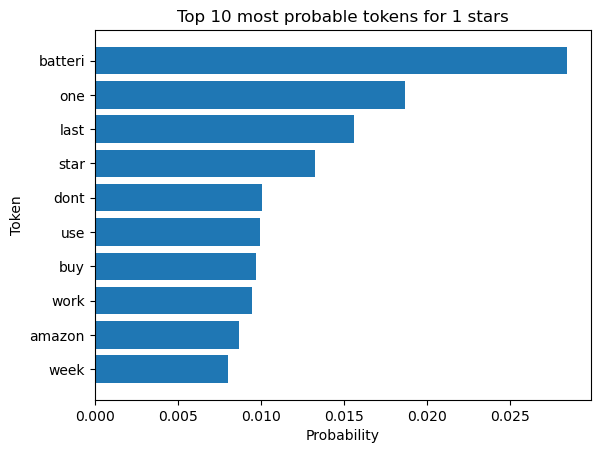

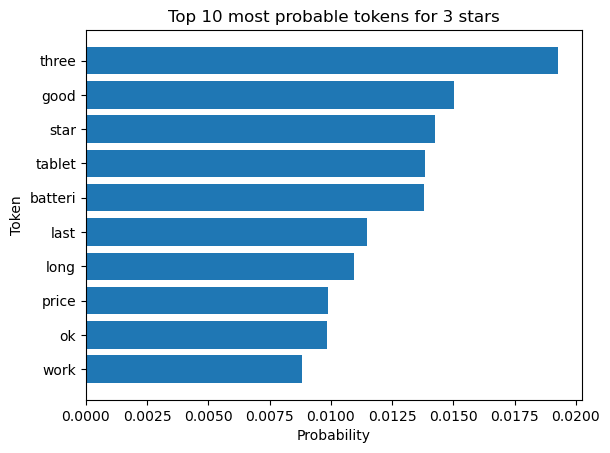

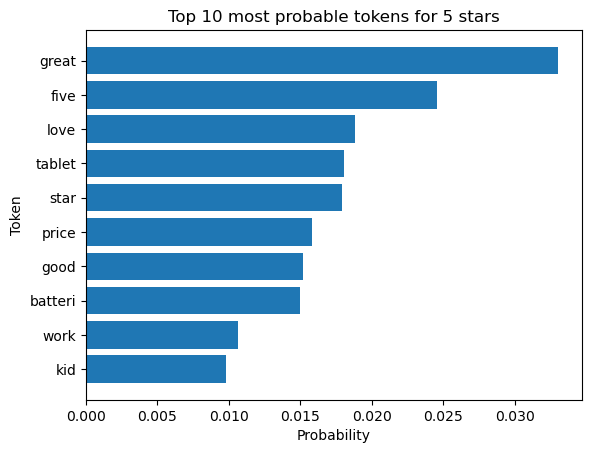

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def display_top_10_most_probable_tokens(nbModel, vectorizer, y):
    # our model has 3 classes: 1, 3, 5 with their respective indices: 0, 1, 2
    indexMap = {1:0, 3:1, 5:2}
    prob = np.exp(nbModel.feature_log_prob_[indexMap.get(y)])
    features = vectorizer.get_feature_names_out()
    sorted_indices = prob.argsort()
    top_10_indices = sorted_indices[-10:]
    top_features = []
    top_features_prob = []
    for i in top_10_indices:
        top_features.append(features[i])
        top_features_prob.append(prob[i])
    plt.barh(top_features, top_features_prob)
    plt.xlabel("Probability")
    plt.ylabel("Token")
    plt.title(f"Top 10 most probable tokens for {y} stars")
    plt.show()

display_top_10_most_probable_tokens(nbModel, vectorizer, 1)
display_top_10_most_probable_tokens(nbModel, vectorizer, 3)
display_top_10_most_probable_tokens(nbModel, vectorizer, 5)

Que pouvez-vous remanquer à propos des jetons affichés dans le graphique?

> *Les jetons qui apparaissent dans chaque classe sont très similaires aux top 10 jetons les plus fréquents de chaque classe*

<a name='2.2.4'></a>
#### 2.2.4 Visualisation des erreurs commises  (3 points)

Trouvez toutes les phrases dont la vraie valeur est 5 mais la valeur prédite est de 1.

Affichez ces exemples d'une manière lisible.


In [24]:
temp_df = pd.DataFrame({'text': X_test, 'true_rating': y_test, 'predicted_rating': nb_predictions})
sentence_indices = temp_df["text"][(temp_df["true_rating"] == 5) & (temp_df["predicted_rating"] == 1)].index

print("Sentences that were rated 5 stars but were predicted as 1 star: \n")
for i in sentence_indices:
    print(data["text_original"][i])
    print("\n")
    

Sentences that were rated 5 stars but were predicted as 1 star: 

Had one already, like it. Gave to my Grandchildren for Christmas, would like to get another for the same price for another Grandchild.


I have had these only for a week I cannot ... I have had these only for a week I cannot tell you anymore


Battery replenishment Battery replenishment


Best (AAA) Batteries for your Buck! I prefer purchasing my batteries in bulk, so that I can buy them once and forget about them for the upcoming months (or year). AmazonBasics was, at the time of purchase, the most economical pack of AAA batteries.I haven't noticed any difference in time or quality of use. I don't use AAA batteries for many things, though, and for those that I do the items tend to last for quite some time on a pair of batteries, so I would not notice a change unless the batteries were really, really poor quality. Thankfully, they're not, and their price point made them a steal for me. These also store well - I have had 

<a name='2.2.5'></a>
#### 2.2.5 Analyse d'erreurs commises (7 points)

Complétez la fonction plot_example qui:
   - Prend en entrée une liste de jetons provenant d'un exemple. 
   - Produit un graphique qui pour chaque jeton, affiche la valeur P(x_i|y=5) et P(x_i|y=1)
    
**Pour vous faciliter le travail, utiliser barh de pandas et non de matplotlib**: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html


#### a) Exécutez votre fonction avec une phrase au choix dont la vraie valeur est 5 mais la valeur prédite est de 1. (4 points)

In [31]:
def plot_example(tokens):
    one_star_prob = np.exp(nbModel.feature_log_prob_[0])
    five_stars_prob = np.exp(nbModel.feature_log_prob_[2])
    features = vectorizer.get_feature_names_out()
    # create a map to get the index of a token
    tokensMap = {}
    index, one, five = [], [], []
    for i in range(len(features)):
        tokensMap[features[i]] = i
    for token in tokens:
        if token in tokensMap:
            index.append(token)
            one.append(one_star_prob[tokensMap[token]])
            five.append(five_stars_prob[tokensMap[token]])
    chart_df = pd.DataFrame({'one_star_prob': one, 'five_star_prob': five}, index=index)
    ax = chart_df.plot.barh()

['one', 'alreadi', 'like', 'gave', 'grandchildren', 'christma', 'would', 'like', 'get', 'anoth', 'price', 'anoth', 'grandchild']


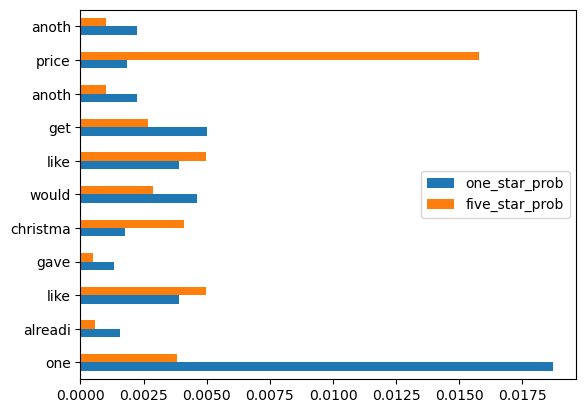

In [41]:
tokens = data["text"][sentence_indices[0]]
print(tokens)
plot_example(data["text"][sentence_indices[0]])

#### b) Suite à cette analyse, pouvez-vous voir une tendance dans les exemples qui sont prédits comme faisant partie de la classe 1 mais faisant réellement partie de la classe 5 ?  (3 points)

> *Certains jetons ont tendance à avoir beaucoup plus de poids dans la prédiction que d'autres, au point où seulement leur présence dans la phrase déterminera la classe prédite. Cela signifie que notre modèle n'est pas bien entraîné pour détecter le contexte des mots autour d'une phrase (ce qui est normal puisque nous avons utilisé un bag of words)*

<a name='2.3'></a>
### 2.3 Régression logistique (4 points)

Entrainez un modèle de [régression logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) à l'aide de SKLearn en utilisant les données produites en 1.6 et affichez sa performance avec les mêmes métriques que précédemment. 

In [42]:
from sklearn.linear_model import LogisticRegression

lrModel = LogisticRegression()
lrModel.fit(train_matrix, y_train)
lr_predictions = lrModel.predict(test_matrix)

In [43]:
print(classification_report(y_test, lr_predictions, digits=4))

              precision    recall  f1-score   support

           1     0.8413    0.8494    0.8453       312
           3     0.7662    0.7709    0.7685       323
           5     0.8262    0.8118    0.8190       287

    accuracy                         0.8102       922
   macro avg     0.8112    0.8107    0.8109       922
weighted avg     0.8103    0.8102    0.8102       922



<a name='2.4'></a>
### 2.4 MLP (4 points)

Entrainez un modèle neuronal de type [Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) à l'aide de SKLearn en utilisant les données produites en 1.6. Affichez sa performance avec les mêmes métriques que précédemment. 

In [45]:
from sklearn.neural_network import MLPClassifier

mlpModel = MLPClassifier(max_iter=1000)
mlpModel.fit(train_matrix, y_train)
mlp_predictions = mlpModel.predict(test_matrix)

In [46]:
print(classification_report(y_test, mlp_predictions, digits=4))

              precision    recall  f1-score   support

           1     0.8438    0.8654    0.8544       312
           3     0.8072    0.7647    0.7854       323
           5     0.8007    0.8258    0.8130       287

    accuracy                         0.8178       922
   macro avg     0.8172    0.8186    0.8176       922
weighted avg     0.8175    0.8178    0.8174       922



<a name='3'></a>
## 3. Amélioration de modèle (30 points)

Cette dernière partie consistera à améliorer votre modèle de deux façons différentes.

Tout d'abord, vous effectuerez une recherche d'hyper-paramètres avec une validation croisée en utilisant une grille de recherche (GridSearch). Ensuite, vous réaliserez de l'extraction d'attributs (feature extraction) afin d'entraîner un nouveau modèle.

<a name='3.1'></a>
###  3.1 Recherche d'hyper-paramètres et validation croisée (5 points)

La classe [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) permet d'explorer toutes les combinaisons possibles d'hyper-paramètres que l'on spécifie afin de trouver la configuration optimale. De plus, il est tout à fait possible de fusionner les paramètres du pré-traitement et ceux du classificateur en utilisant la classe [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).
Pour la rédaction de votre code, vous avez la possibilité de vous référer au tutoriel du cours.

#### a) Dans cette phase, l'objectif est de découvrir une configuration optimale pour le modèle LogisticRegression en conjonction avec la technique de vectorisation TF-IDF. Cette recherche devra être guidée par la métrique du F1-score pondéré (weighted F1). Vous devrez aussi effectuer une exploration de paramètres sur au moins deux attributs liés à TF-IDF et deux paramètres de la régression logistique. Affichez ensuite la performance finale du modèle optimal ainsi que ses paramètres. (3 points)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(vocabulary=vocabulary)),
    ('regression', LogisticRegression()),
])

parameters = {
    'tfidf__max_features': [1000, 5000, 10000],
    'tfidf__use_idf': [True, False],
    'regression__max_iter': [100, 200, 500, 1000],
    'regression__fit_intercept': [True, False],
}

scoring = make_scorer(f1_score, average='weighted')
gs_clf = GridSearchCV(pipeline, parameters, scoring=scoring, cv=5, n_jobs=-1)
gs_clf.fit([' '.join(sentence) for sentence in X_train], y_train)
y_pred = gs_clf.predict([' '.join(sentence) for sentence in X_test])

print("Meilleurs paramètres trouvés:\n", gs_clf.best_params_, "\n")
print("Meilleur score atteint:\n", gs_clf.best_score_, "\n")

Meilleurs paramètres trouvés:
 {'regression__fit_intercept': True, 'regression__max_iter': 100, 'tfidf__max_features': 1000, 'tfidf__use_idf': True} 

Meilleur score atteint:
 0.8095210112967708 



#### b) Quels sont les attributs que vous avez choisis et quels sont leurs valeurs optimales?  (2 points)

> Les attributs avec leurs valeurs optimales sont: 
{'regression__fit_intercept': True, 
'regression__max_iter': 100, 
'tfidf__max_features': 1000, 
'tfidf__use_idf': True}

<a name='3.2'></a>
###  3.2 Extraction d'attributs (Feature extraction) avec ChatGPT (15 points)

ChatGPT peut être très utile pour donner des idées ou donner du squelette de code (lorsque c'est permis! :) ). Cette partie vous fait explorer l'utilisation de ChatGPT pour générer du code permettant d'extraire des attributs (feature extraction) à partir du texte des évaluations. 

En utilisant ChatGPT ainsi que votre recherche personnelle, essayez de déterminer un ensemble d'attributs que vous pourriez utiliser pour représenter chaque évaluation. A vous de voir comment vous pouvez obtenir une réponse satisfaisante de ChatGPT. 

#### a) Indiquez dans la cellule ci-dessous les descriptions d'attributs suggérées par ChatGPT ainsi que les vôtres. Différenciez clairement vos attributs - s'il y en a - de ceux de ChatGPT. (4 points)


> Voici l'ensemble d'attributs suggérés par ChatGPT: tfidf__max_features, tfidf__ngram_range, regression__C, regression__penalty, regression__solver, regression__class_weight, regression__max_iter, regression__random_state

#### b) Indiquez ci-dessous le code généré par ChatGPT que vous avez décidé de conserver pour représenter chaque évaluation.  (2 points)

In [ ]:
# Create the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create the Logistic Regression model
logistic_regression = LogisticRegression()

# Define the pipeline
pipeline = Pipeline([
    ('tfidfvectorizer', tfidf_vectorizer),
    ('logisticregression', logistic_regression)
])

parameters = {
    'tfidfvectorizer__max_features': [10, 100, 1000, None],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'logisticregression__class_weight': ['balanced', None],
    'logisticregression__max_iter': [100, 500, 1000],
    'logisticregression__random_state': [42]  # Set your desired random seed
}

# Create the GridSearchCV object
gs_clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV to your data
gs_clf.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Use the best model from GridSearchCV to make predictions
best_model = gs_clf.best_estimator_

# Assuming you have a test dataset X_test
y_pred = best_model.predict(X_test)



#### c) Il se peut que le code généré ait besoin d'être adapté à notre jeu de données. Si c'est le cas, corrigez le code et montrez le résultat après vos correction dans la cellule ci-dessous. Le code final devrait être une fonction qui vous retourne, pour un document, un dictionnaire d'attributs et leurs valeurs. N'oubliez pas d'indiquer votre propre code s'il y en a. (5 points)

#### d) Utilisez le code corrigé ci-dessus pour entrainer un modèle MLP avec votre nouvelle représentation des évaluations. Affichez sa performance. (4 points)

<a name='3.3'></a>
### 3.3 Amélioration du modèle en 3.2 (10 points)

Il est possible que les résultats obtenus au numéro précédent ne soient pas très élevés. 

#### a) Trouvez une manière d'utiliser ces attributs avec d'autres éléments afin **d'au moins** obtenir une meilleure performance que n'importe quel score obtenu au numéro 2.x , **sans faire de recherche d'hyper-paramètres**. Essayez d'obtenir la meilleure performance possible. Vous êtes libres d'utiliser n'importe quel algorithme de ce laboratoire. Affichez le code et les performances de votre modèle. (8 points)

#### b) Quelles sont vos conclusions concernant l'utilisation de ChatGPT et les représentations possibles des documents ? (2 points)

> *Entrez votre réponse ici*

## LIVRABLES:
Vous devez remettre sur Moodle, avant la date d'échéance, un zip contenant les fichiers suivants :

1-	Le code : Vous devez compléter le squelette inf8460_A23_TP1.ipynb sous le nom   GR0X_equipe_i_inf8460_A23_TP1(X: numéro du groupe de laboratoire; i = votre numéro d’équipe). Indiquez vos noms et matricules au début du notebook. Ce notebook doit contenir les fonctionnalités requises. 

2-	Un fichier pdf représentant votre notebook complètement exécuté sous format pdf. 
Pour créer le fichier cliquez sur File > Download as > PDF via LaTeX (.pdf). Assurez-vous que le PDF est entièrement lisible.


## EVALUATION 

Votre TP sera évalué selon les critères suivants :

1. Exécution correcte du code: Tout votre code et vos résultats doivent être exécutables et reproductibles.
2. Qualité du code (noms significatifs, structure, gestion d’exception, etc.) avec, entre autres, les recommandations suivantes:
    - Il ne devrait pas y avoir de duplication de code. Utilisez des fonctions pour garder votre code modulaire
    - Votre code devrait être optimisé: un code trop lent entraînera une perte de points
3. Lisibilité du code (Commentaires clairs et informatifs): Le code doit être exécutable sans erreur et accompagné de commentaires appropriés de manière à expliquer les différentes fonctions
4. Performance attendue des modèles
5. Effort effectué dans la recherche d'autres types d'attributs et dans l'utilisation de ChatGPT
6. Réponses correctes/sensées aux questions de réflexion ou d'analyse
7. PDF entièrement lisible. Les parties illisibles ne seront pas corrigées et aucune modification passée la date de remise ne sera acceptée.
 
